# Artist

There are three layers to the Matplotlib API.

* the `matplotlib.backend_bases.FigureCanvas` is the area onto which the figure is drawn
* the `matplotlib.backend_bases.Renderer` is the object which knows how to draw on the FigureCanvas
* and the `matplotlib.artist.Artist` is the object that knows how to use a renderer to paint onto the canvas.

The `FigureCanvas` and `Renderer` handle all the details of talking to user interface toolkits like wxPython or drawing languages like PostScript®, and the `Artist` handles all the high level constructs like representing and laying out the figure, text, and lines. The typical user will spend 95% of their time working with the Artists.

There are two types of Artist: Primitives and Container
* Primitives: The premitives represent the standard graphical objects we want to paint onto our canvas like Line2D, Rectangle, Text, AxesImage, etc.
* Container: The containers are places to put all the primitives in Axis, Axes and Figure so here these three are called containers. In which Figure is called the Top level container in all of them becaues it can contain Axes and which contains Axis.

The standard use is to create a Figure instance, use the Figure to create one or more Axes or Subplot instances, and use the Axes instance helper methods to create the primitives. 

 In the example below, we create a Figure instance using `matplotlib.pyplot.figure()`, which is a convenience method for instantiating Figure instances and connecting them with your user interface or drawing toolkit FigureCanvas.

In [23]:
import matplotlib.pyplot as plt
import numpy as np

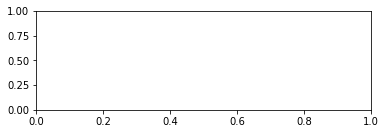

In [2]:
# creating a figure 
fig = plt.figure()   # creating an instance of figure
# in this figure we will make some axes instance.

# Adding the axes with the help of the fig.add_subplot()
ax = fig.add_subplot(2, 1, 1)
# two row, one column and first plot or you can say at index 1.

The Axes is probably the most important class in the Matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods ($\color{#d68354}{\text{plot(), text(), hist(), imshow()}}$) to create the most common graphics primitives ($\color{#d68354}{\text{Line2D, Text, Rectangle, AxesImage, respectively}}$). 

 These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested. Most of you are probably familiar with the Subplot, which is just a special case of an Axes that lives on a regular rows by columns grid of Subplot instances.

If you want to create an Axes at an arbitrary location, simply use the add_axes() method which takes a list of **[left, bottom, width, height]** values in 0-1 relative figure coordinates:

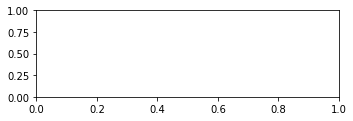

In [7]:
fig2 = plt.figure()
ax1 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

Note: since in fig2 there is only one axes so we will not see the relative position of the new axes so to see the effect of the add_axes() with position value we need to add two axes on the save figure.

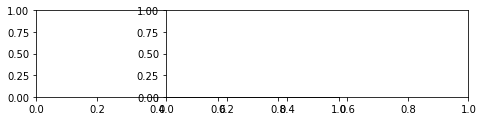

In [8]:
fig2 = plt.figure()
ax1 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])
ax2 = fig2.add_axes([0.45, 0.1, 0.7, 0.3])

As you can see that we have added a new axes on the same figure by providing the relative positon coords to the figure.

In this example, ax is the Axes instance created by the fig.add_subplot call above (remember Subplot is just a subclass of Axes) and when you call ax.plot, it creates a Line2D instance and adds it to the `Axes.lines` list.

### Adding lines

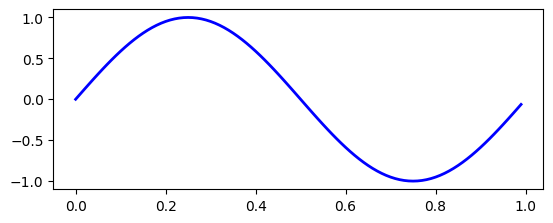

In [30]:
# adding a line instance by using the plot method in the axes instance.
fig = plt.figure(figsize=(7,6), dpi=100)
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

# creating a random data to draw the line.
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)

# creating the line by using the plot method,
lines = ax.plot(t, s, color='blue', lw=2)
# here line is a list of lines

In [31]:
# inspecting the lines
print(lines)
# we can see all the lines are drawn in the current axes
# by using the Axes.lines attribute.
print(ax.lines)

As you can see that it is a list in which we have a LIne2D object. Since we have only added one line by using .plot() method that's why here is only one line.

if we add another line then we can see two Line2D object in our Axes.lines list

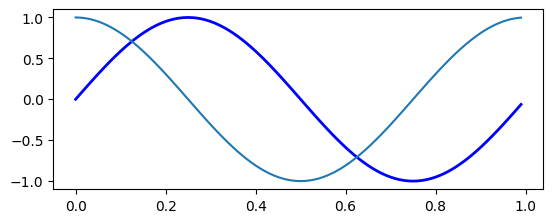

In [32]:
# adding a line instance by using the plot method in the axes instance.
fig = plt.figure(figsize=(7,6), dpi=100)
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

# creating a random data to draw the line.
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)

# creating the line by using the plot method,
lines = ax.plot(t, s, color='blue', lw=2)
# here line is a list of lines
c = np.cos(2*np.pi*t)
# adding another line in the axes.

lines = ax.plot(t,c)
plt.show()

Now if we see the lines then we will get two lines in the lines list.

In [33]:
# inspecting lines
print(lines)
print(ax.lines)

[<matplotlib.lines.Line2D object at 0x000002780E6920D0>, <matplotlib.lines.Line2D object at 0x000002780E692430>]


As you can that ther are now two line present in the `ax.lines` attribute.

If you make subsequent calls to ax.plot (and the hold state is "on" which is the default) then additional lines will be added to the list. You can remove lines later simply by calling the list methods

### Deleting Lines

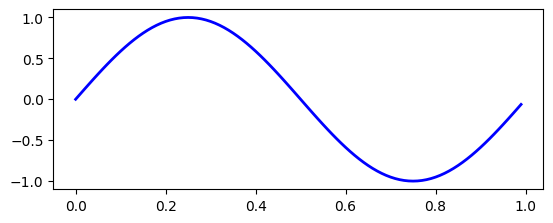

In [38]:
# adding a line instance by using the plot method in the axes instance.
fig = plt.figure(figsize=(7,6), dpi=100)
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

# creating a random data to draw the line.
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)

# creating the line by using the plot method,
lines = ax.plot(t, s, color='blue', lw=2)
# here line is a list of lines
c = np.cos(2*np.pi*t)
# adding another line in the axes.
lines = ax.plot(t,c)

# Now will delete the lines by using the del keyword
del ax.lines[-1] #deleting the  last line in the ax.list
plt.show()

In [39]:
# Now if we inspect the ax.lines
print(ax.lines)


Total lines before deleting:  [<matplotlib.lines.Line2D object at 0x00000278118ED6A0>, <matplotlib.lines.Line2D object at 0x00000278118ED400>]

Total lines after deleting:  [<matplotlib.lines.Line2D object at 0x00000278118ED6A0>]


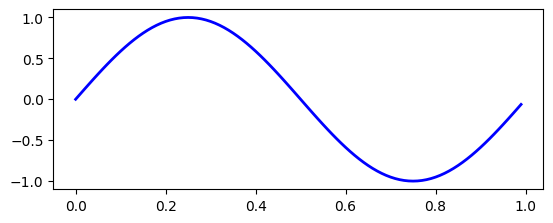

In [43]:
# adding a line instance by using the plot method in the axes instance.
fig = plt.figure(figsize=(7,6), dpi=100)
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

# creating a random data to draw the line.
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)

# creating the line by using the plot method,
lines = ax.plot(t, s, color='blue', lw=2)
# here line is a list of lines
c = np.cos(2*np.pi*t)
# adding another line in the axes.
new_line = ax.plot(t,c)

print("\nTotal lines before deleting: ", ax.lines)
# Now will delete the lines by using helper method.
ax.lines.remove(ax.lines[-1])  # deleting the last line.
print("\nTotal lines after deleting: ", ax.lines)
plt.show()

### Setting Labels

The Axes also has helper methods to configure and decorate the x-axis and y-axis tick, tick labels and axis labels:

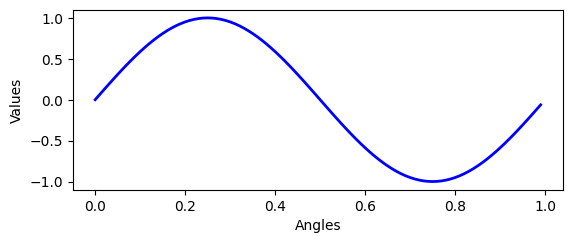

In [45]:
# adding a line instance by using the plot method in the axes instance.
fig = plt.figure(figsize=(7,6), dpi=100)
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

# creating a random data to draw the line.
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)

# creating the line by using the plot method,
lines = ax.plot(t, s, color='blue', lw=2)

# adding labels
xtext = ax.set_xlabel("Angles")
ytext = ax.set_ylabel('Values')

plt.show()

When you call `ax.set_xlabel`, it passes the information on the Text instance of the XAxis. Each Axes instance contains an `XAxis` and a `YAxis` instance, which handle the layout and drawing of the ticks, tick labels and axis labels.

In [46]:
# if we inspect the xtext and ytext
print("xtext object: ", xtext)
print("ytext object: ", ytext)

xtext object:  Text(0.5, 24.0, 'Angles')
ytext object:  Text(24.00000000000002, 0.5, 'Values')


As you can see that set_xlabel and set_ylabel give us the text object which is placed as the labels.

we can directly use these object to change the property of the xlabel and ylabel. if we want ot see the all current properties of the xtext or ytext then we can use the 
`Text.properties()` method to see all the current properties.

In [49]:
xtext.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'bbox_patch': None,
 'children': [],
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'color': 'black',
 'contains': None,
 'figure': <Figure size 700x600 with 1 Axes>,
 'fontfamily': ['sans-serif'],
 'fontname': 'DejaVu Sans',
 'fontproperties': <matplotlib.font_manager.FontProperties at 0x27810b446d0>,
 'fontsize': 10.0,
 'fontstyle': 'normal',
 'fontvariant': 'normal',
 'fontweight': 'normal',
 'gid': None,
 'horizontalalignment': 'center',
 'in_layout': True,
 'label': '',
 'path_effects': [],
 'picker': None,
 'position': (0.5, 24.0),
 'prop_tup': (0.5,
  24.0,
  'Angles',
  'black',
  'top',
  'center',
  8148757912991194678,
  None,
  None,
  100,
  <weakref at 0x0000027810EDD5E0; to 'RendererAgg' at 0x0000027810BFC9A0>,
  1.2),
 'rasterized': None,
 'rotation': 0.0,
 'rotation_mode': None,
 'sketch_params': None,
 'snap': None,
 'stretch': 'normal',
 'text': 'Angles',
 'transform': <matplotlib.transforms.Blended

### Setting label and title on Multiple Axes

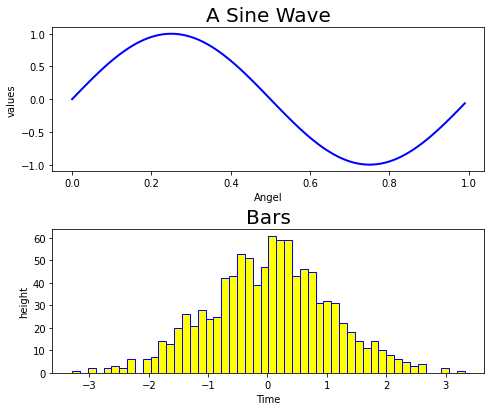

In [61]:
# In this we will create two Axes in a single figure and we will 
# set their properties individually.

# Creating a figure.
fig = plt.figure()

# adding two axes on the same figure.
ax1 = fig.add_axes([0,0.7,1,0.5])
ax2 = fig.add_axes([0,0,1,0.5])

# Now we will add some data in these axes individually

# adding a line to ax1
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# adding bars in ax2
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='blue')

# adding title on both axes.
ax1.set_title("A Sine Wave", fontsize=20)
ax2.set_title("Bars", fontsize=20)

# adding labels on ax1
ax1.set_xlabel("Angel")
ax1.set_ylabel("values")

# adding labels on ax2
ax2.set_xlabel("Time")
ax2.set_ylabel("height")

plt.show()

___

### Customizing your objects
* Every element in the figure is represented by a Matplotlib `Artist`, and each has an extensive list of properties to configure its appearance.

* The figure itself contains a `Rectangle` exactly the size of the figure, which you can use to set the background color and transparency of the figures.

* Each Axes bounding box (the standard white box with black edges in the typical Matplotlib plot, has a Rectangle instance that determines the color, transparency, and other properties of the Axes. These instances are stored as member variables `Figure.patch` and `Axes.patch`. Every Matplotlib Artist has the following properties

* To get the property we need to ues .get_'property-name' and to set the property use .set_'property-name'.

* If you want to set a number of properties at once, you can also use the set method with keyword arguments. for example:
```ruby
x.set(alpha=0.5*a)
```

### Getting all properties of an artist
if we want to get the all properties of an artist then we can get the property of the artist by using the `matplotlib.artist.getp(artist_name)` or if we are using pyplot as plt then we can get all the properties by using `plt.getp(atrist_name)`.

In [68]:
# by using pypot getting all properties
plt.getp(fig)

# Note: if we need properties in (OO) interface then we need to use
# matplotlib.artist.getp(artist_name)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._axes.Axes object at 0x000002781...
    children = [<matplotlib.patches.Rectangle object at 0x0000027...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    contains = None
    default_bbox_extra_artists = [<matplotlib.axes._axes.Axes object at 0x000002781...
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 4.0
    figure = None
    figwidth = 6.0
    frameon = True
    gid = None
    in_layout = True
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [6. 4.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     Bbox(x0=0.0, y0=

In [78]:
from matplotlib import artist as art
art.getp(fig)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._axes.Axes object at 0x000002781...
    children = [<matplotlib.patches.Rectangle object at 0x0000027...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    contains = None
    default_bbox_extra_artists = [<matplotlib.axes._axes.Axes object at 0x000002781...
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 4.0
    figure = None
    figwidth = 6.0
    frameon = True
    gid = None
    in_layout = True
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [6. 4.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     Bbox(x0=0.0, y0=

## 1. Object containers
Now that we know how to inspect and set the properties of a given object we want to configure, we need to know how to get at that object. As mentioned in the introduction, there are two kinds of objects: primitives and containers. The primitives are usually the things you want to configure (the font of a Text instance, the width of a Line2D) although the containers also have some properties as well -- for example the Axes Artist is a container that contains many of the primitives in your plot, but it also has properties like the xscale to control whether the xaxis is 'linear' or 'log'. In this section we'll review where the various container objects store the Artists that you want to get at.

### Figure container

The top level container Artist is the `matplotlib.figure.Figure`, and it contains everything in the figure. The background of the figure is a `Rectangle` which is stored in `Figure.patch`. As you add subplots (add_subplot()) and axes (add_axes()) to the figure these will be appended to the `Figure.axes`. These are also returned by the methods that create them:

```ruby
fig = plt.figure()

ax1 = fig.add_subplot(211)

ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])

ax1
<AxesSubplot:>

print(fig.axes)
[<AxesSubplot:>, <matplotlib.axes._axes.Axes object at 0x7f0768702be0>]
```

### Adding lines on the figure
Since figure is a container object can have all the primitive object, so we can make our own custom figure layout by using all the primitives.

The figure also has its own images, lines, patches and text attributes, which you can use to add primitives directly. When doing so, the default coordinate system for the Figure will simply be in pixels (which is not usually what you want). If you instead use Figure-level methods to add Artists (e.g., using Figure.text to add text), then the default coordinate system will be "figure coordinates" where (0, 0) is the bottom-left of the figure and (1, 1) is the top-right of the figure.

As with all Artists, you can control this coordinate system by setting the transform property. You can explicitly use "figure coordinates" by setting the Artist transform to fig.transFigure:

In this we will add some lines in the figure.
Note: pass the values as `(left-x1, right-x2) and (left-y1, right-y2)`

In [79]:
from matplotlib.lines import Line2D

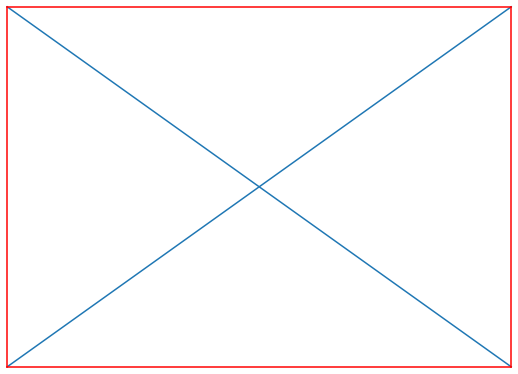

In [171]:
# first of all we need to create a figure 
fig = plt.figure(figsize=(7, 5), facecolor='white')

# adding lines in the figure
# creating a L-R diagonale line on the figure
# (left-x1, right-x2) and (left-y1, right-y2)  # 
l1 = Line2D([0,1], [0,1], figure=fig, transform = fig.transFigure)
l2 = Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)

# transform used to set the coordinate of the line relative to the figure
fig.lines.extend([l1, l2])

# adding all four border in red color
top =  Line2D([1,0],[1,1], figure=fig, transform = fig.transFigure, color='red')
bottom = Line2D([0,1],[0,0], figure=fig, transform = fig.transFigure, color='red')
left = Line2D([0, 0], [1, 0], transform=fig.transFigure, figure=fig, color='red')
right = Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='red')
fig.lines.extend([top, left, right, bottom])
plt.show()

___

## 2. Axes Container

The matplotlib.axes.Axes is the center of the Matplotlib universe -- it contains the vast majority of all the Artists used in a figure with many helper methods to create and add these Artists to itself, as well as helper methods to access and customize the Artists it contains. Like the Figure, it contains a Patch patch which is a Rectangle for Cartesian coordinates and a Circle for polar coordinates.

This patch determines the shape, background and border of the plotting region.

**Axes Patch**

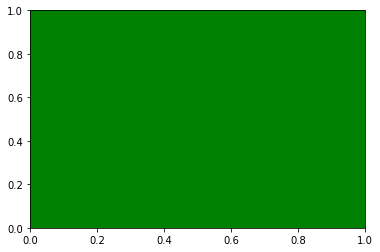

In [172]:
# creating a figure
fig = plt.figure()

# adding a subplot which will give use an axes instance
ax = fig.add_subplot()

rect = ax.patch   # Rectangle instance

# Now we will change the properties of the rect
rect.set_facecolor('green')
plt.show()

### adding lines in the axes

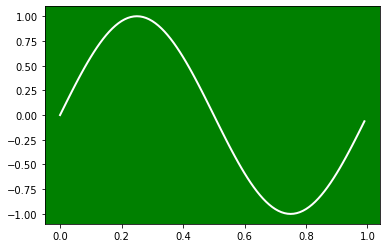

In [173]:
# creating a figure
fig = plt.figure()

# adding a subplot which will give use an axes instance
ax = fig.add_subplot()

rect = ax.patch   # Rectangle instance

# Note: all the Rectange instance will be found in ax.patch

# Now we will change the properties of the rect
rect.set_facecolor('green')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='white', lw=2) # a sine wave in white color
# all the lines added to the ax will be appedned in the 
# axes.lines



plt.show()

**`Note:`**

You should not add objects directly to the Axes.lines or Axes.patches lists unless you know exactly what you are doing, because the Axes needs to do a few things when it creates and adds an object. It sets the figure and axes property of the Artist, as well as the default Axes transformation (unless a transformation is set). It also inspects the data contained in the Artist to update the data structures controlling auto-scaling, so that the view limits can be adjusted to contain the plotted data. You can, nonetheless, create objects yourself and add them directly to the Axes using helper methods like add_line() and add_patch(). 

## 3. Axis Containers: XAxis & YAxis
In addition to all of these Artists, the Axes contains two important Artist containers: the XAxis and YAxis, which handle the drawing of the ticks and labels. These are stored as instance variables xaxis and yaxis.

The matplotlib.axis.Axis instances handle the drawing of the tick lines, the grid lines, the tick labels and the axis label. You can configure the left and right ticks separately for the y-axis, and the upper and lower ticks separately for the x-axis.

* The Axis also stores the data and view intervals used in auto-scaling, panning and zooming, as well as the Locator and Formatter instances which control where the ticks are placed and how they are represented as strings.

* Each Axis object contains a label attribute (this is what pyplot modifies in calls to xlabel and ylabel) as well as a list of major and minor ticks. The ticks are axis.XTick and axis.YTick instances, which contain the actual line and text primitives that render the ticks and ticklabels. Because the ticks are dynamically created as needed (e.g., when panning and zooming), you should access the lists of major and minor ticks through their accessor methods axis.Axis.get_major_ticks and axis.Axis.get_minor_ticks. 

* Although the ticks contain all the primitives and will be covered below, Axis instances have accessor methods that return the tick lines, tick labels, tick locations etc.

ticklocs:  [0.  0.2 0.4 0.6 0.8 1. ]


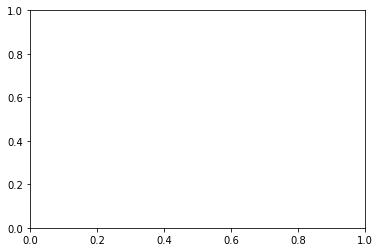

In [179]:
fig, ax = plt.subplots()
axis = ax.xaxis
print("ticklocs: ", axis.get_ticklocs())

In [178]:
axis.get_ticklabels()

[Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0, 0, '1.0')]

In [183]:
list(axis.get_ticklines())

<table border="1" class="docutils align-default">
<colgroup>
<col width="39%">
<col width="61%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Axis accessor method</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_scale.html#matplotlib.axis.Axis.get_scale" title="matplotlib.axis.Axis.get_scale"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_scale</span></code></a></td>
<td>The scale of the Axis, e.g., 'log' or 'linear'</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_view_interval.html#matplotlib.axis.Axis.get_view_interval" title="matplotlib.axis.Axis.get_view_interval"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_view_interval</span></code></a></td>
<td>The interval instance of the Axis view limits</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_data_interval.html#matplotlib.axis.Axis.get_data_interval" title="matplotlib.axis.Axis.get_data_interval"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_data_interval</span></code></a></td>
<td>The interval instance of the Axis data limits</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_gridlines.html#matplotlib.axis.Axis.get_gridlines" title="matplotlib.axis.Axis.get_gridlines"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_gridlines</span></code></a></td>
<td>A list of grid lines for the Axis</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_label.html#matplotlib.axis.Axis.get_label" title="matplotlib.axis.Axis.get_label"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_label</span></code></a></td>
<td>The Axis label - a <a class="reference internal" href="../../api/text_api.html#matplotlib.text.Text" title="matplotlib.text.Text"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Text</span></code></a> instance</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_offset_text.html#matplotlib.axis.Axis.get_offset_text" title="matplotlib.axis.Axis.get_offset_text"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_offset_text</span></code></a></td>
<td>The Axis offset text - a <a class="reference internal" href="../../api/text_api.html#matplotlib.text.Text" title="matplotlib.text.Text"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Text</span></code></a> instance</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_ticklabels.html#matplotlib.axis.Axis.get_ticklabels" title="matplotlib.axis.Axis.get_ticklabels"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_ticklabels</span></code></a></td>
<td>A list of <a class="reference internal" href="../../api/text_api.html#matplotlib.text.Text" title="matplotlib.text.Text"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Text</span></code></a> instances -
keyword minor=True|False</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_ticklines.html#matplotlib.axis.Axis.get_ticklines" title="matplotlib.axis.Axis.get_ticklines"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_ticklines</span></code></a></td>
<td>A list of <a class="reference internal" href="../../api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D" title="matplotlib.lines.Line2D"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Line2D</span></code></a> instances -
keyword minor=True|False</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_ticklocs.html#matplotlib.axis.Axis.get_ticklocs" title="matplotlib.axis.Axis.get_ticklocs"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_ticklocs</span></code></a></td>
<td>A list of Tick locations -
keyword minor=True|False</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_major_locator.html#matplotlib.axis.Axis.get_major_locator" title="matplotlib.axis.Axis.get_major_locator"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_major_locator</span></code></a></td>
<td>The <a class="reference internal" href="../../api/ticker_api.html#matplotlib.ticker.Locator" title="matplotlib.ticker.Locator"><code class="xref py py-obj docutils literal notranslate"><span class="pre">ticker.Locator</span></code></a> instance for major ticks</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_major_formatter.html#matplotlib.axis.Axis.get_major_formatter" title="matplotlib.axis.Axis.get_major_formatter"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_major_formatter</span></code></a></td>
<td>The <a class="reference internal" href="../../api/ticker_api.html#matplotlib.ticker.Formatter" title="matplotlib.ticker.Formatter"><code class="xref py py-obj docutils literal notranslate"><span class="pre">ticker.Formatter</span></code></a> instance for major
ticks</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_minor_locator.html#matplotlib.axis.Axis.get_minor_locator" title="matplotlib.axis.Axis.get_minor_locator"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_minor_locator</span></code></a></td>
<td>The <a class="reference internal" href="../../api/ticker_api.html#matplotlib.ticker.Locator" title="matplotlib.ticker.Locator"><code class="xref py py-obj docutils literal notranslate"><span class="pre">ticker.Locator</span></code></a> instance for minor ticks</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_minor_formatter.html#matplotlib.axis.Axis.get_minor_formatter" title="matplotlib.axis.Axis.get_minor_formatter"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_minor_formatter</span></code></a></td>
<td>The <a class="reference internal" href="../../api/ticker_api.html#matplotlib.ticker.Formatter" title="matplotlib.ticker.Formatter"><code class="xref py py-obj docutils literal notranslate"><span class="pre">ticker.Formatter</span></code></a> instance for minor
ticks</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_major_ticks.html#matplotlib.axis.Axis.get_major_ticks" title="matplotlib.axis.Axis.get_major_ticks"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_major_ticks</span></code></a></td>
<td>A list of <a class="reference internal" href="../../api/axis_api.html#matplotlib.axis.Tick" title="matplotlib.axis.Tick"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Tick</span></code></a> instances for major ticks</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.get_minor_ticks.html#matplotlib.axis.Axis.get_minor_ticks" title="matplotlib.axis.Axis.get_minor_ticks"><code class="xref py py-obj docutils literal notranslate"><span class="pre">get_minor_ticks</span></code></a></td>
<td>A list of <a class="reference internal" href="../../api/axis_api.html#matplotlib.axis.Tick" title="matplotlib.axis.Tick"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Tick</span></code></a> instances for minor ticks</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../../api/_as_gen/matplotlib.axis.Axis.grid.html#matplotlib.axis.Axis.grid" title="matplotlib.axis.Axis.grid"><code class="xref py py-obj docutils literal notranslate"><span class="pre">grid</span></code></a></td>
<td>Turn the grid on or off for the major or minor
ticks</td>
</tr>
</tbody>
</table>

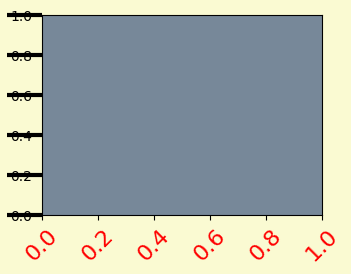

In [185]:
# plt.figure creates a matplotlib.figure.Figure instance
fig = plt.figure(figsize=(7, 5), dpi=100)
rect = fig.patch  # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()

## 4. Tick containers 
The `matplotlib.axis.Tick` is the final container object in our descent from the Figure to the Axes to the Axis to the Tick. The Tick contains the tick and grid line instances, as well as the label instances for the upper and lower ticks. Each of these is accessible directly as an attribute of the Tick.

None
None
None
None
None
None
None
None
None


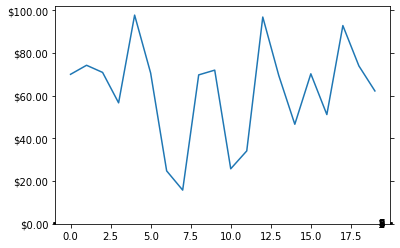

In [233]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# Use automatic StrMethodFormatter
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_ticks([i/10 for i in range(10)], minor=True, )
# ax.yaxis.set_tick_params(labelright=True)
yTickLabels = ax.yaxis.set_ticklabels([str(i) for i in range(10)], minor=True)
for label in yTickLabels:
    print(label.set_position((1, label.get_position()[1])))
yTicks = ax.yaxis.get_minor_ticks()
# setting False to labelleft will disable the ticklabel on the left side
# setting True to labelright will show the ticklabel on the left side

plt.show()

In [218]:
for tick in yTicks:
    print(tick.get_loc(), tick.)


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [231]:
for label in yTickLabels:
    print(label.set_position((1, label.get_position()[1])))

None
None
None
None
None
None
None
None
None


In [232]:
yTickLabels

[Text(1, 0.1, '1'),
 Text(1, 0.2, '2'),
 Text(1, 0.3, '3'),
 Text(1, 0.4, '4'),
 Text(1, 0.5, '5'),
 Text(1, 0.6, '6'),
 Text(1, 0.7, '7'),
 Text(1, 0.8, '8'),
 Text(1, 0.9, '9')]